In [2]:
from pylab import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
    })

plt.rc('text.latex', preamble=r'\usepackage[T1,T2A]{fontenc}\usepackage[utf8]{inputenc}\usepackage{cmsrb}\usepackage{amsmath}\usepackage[Symbolsmallscale]{upgreek}\usepackage{icomma}')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


# Decimalni zarez
import locale
locale.setlocale(locale.LC_NUMERIC, "sr_RS.utf8")
plt.rcParams['axes.formatter.use_locale'] = True


def u(t):
    return (t > 0) * 1.0

In [5]:
def generate_canvas(w = 1.6, a = 1.618):
    fig = figure (figsize = (a*w, w))
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(visible=True, which='major', color='0.45', linestyle='-')
    grid(visible=True, which='minor', color='0.75', linestyle='--')

    return fig

def plot_dirac(x, A, lw = 1.5, c = 'k'):
    arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=0.2, head_length=0.3, length_includes_head=True, zorder=10)
    

In [7]:
def multiple_formatter(denominator=3, number=np.pi, latex=r'\uppi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\dfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\dfrac{%s}{%s}$'%(latex,den)
            elif num>1:
                return r'$\dfrac{%s%s}{%s}$'%(num,latex,den)
            elif num<-1:
                return r'$-\dfrac{%s%s}{%s}$'%(abs(num),latex,den)
                
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r'\uppi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

/tmp/ipykernel_45510/2646719972.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))
/tmp/ipykernel_45510/1458499095.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("blokovi_plot.pdf", bbox_inches='tight', ppad_inches = 0)


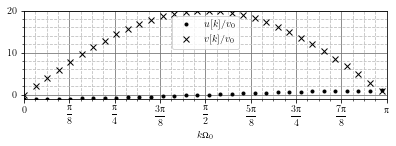

In [77]:
width = 165 / 25.4 # sirina
height = width / 4
fig = figure (figsize = (width, height))
xlim([-2,2])
ylim([-2,2])
minorticks_on()
grid(visible=True, which='major', color='0.45', linestyle='-')
grid(visible=True, which='minor', color='0.75', linestyle='--')

ax = fig.gca()
xlim([0, pi])
ylim([-1, 20])

alpha = 400
n = np.arange(0, 40);
omega = arccos( (alpha-1)/(alpha+1) )
x = omega*n
y1 = - cos(omega*n)
y2 = + sqrt(alpha) * sin(omega*n)
plot(x, y1, 'k.')
plot(x, y2, 'kx')

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=8)))

xlabel(r"$k \Upomega_0$")
legend([r"$u[k]/v_0$", r"$v[k]/v_0$"]) 

plt.savefig("blokovi_plot.pdf", bbox_inches='tight', ppad_inches = 0)

In [70]:
height

14.37007874015748